# AutoCoder

The high level idea is to first produce a language model for programming languages. It can then be used to do cool machine learning on code. I yet do not know what that is.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from fastai import *

## Preparing the data

Download the data from my github

In [4]:
path = untar_data('https://github.com/DerJesko/autocoder/raw/master/data/modified/c')

In [7]:
#path.ls()

In [10]:
data_lm = (TextList.from_folder(path)
                   .split_by_rand_pct(0.1)
                   .label_for_lm()
                   .databunch(bs=64))
data_lm

TextLMDataBunch;

Train: LabelList (16916 items)
x: LMTextList
xxbos comment xxwrep 4 preproc const var0 var1 ; const var0 var2 ; const var0 var3 ; const var0 var4 ; const var0 var5 ;,xxbos comment xxwrep 8 preproc comment void var0 ( var1 * var2 ) { var2 - > var3 = 0 ; var2 - > var4 = 0 ; var2 - > var5 = 0 ; var6 ( & var2 - > var7 ) ; var6 ( & var2 - > var8 ) ; var6 ( & var2 - > var9 ) ; var2 - > var10 = floatl ; } comment void var11 ( var1 * var2 , const var12 * var13 , var14 * var15 ) { if ( var2 - > var3 = = 0 ) { var2 - > var8 = * var13 ; var2 - > var5 = var15 - > var3 ; var2 - > var7 = * var13 ; var2 - > var4 = var15 - > var3 ; } if ( ( var13 - > var16 < var2 - > var7 . var16 ) | | ( ( var13 - > var16 = = var2 - > var7 . var16 ) & & ( var13 - > var17 < var2 - > var7 . var17 ) ) ) { var2 - > var7 = * var13 ; var2 - > var4 = var15 - > var3 ; } if ( ( var13 - > var16 > var2 - > var8 . var16 ) | | ( ( var13 - > var16 = = var2 - > var8 . var16 ) & & ( var13 - > var17 > var2 - > var8 .

Now all the code is in a TextDataBunch. This automatically handles the rest of the tokenization and the numericalization

In [0]:
data_lm.save()

Let's look at some of the tokens it produced

In [6]:
data_lm.vocab.itos[:15]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 ',',
 ')',
 '(',
 ';',
 'stringl',
 '=']

## Language model

In [7]:
data_lm.show_batch()

idx,text
0,var22 ; } var23 ; static var23 var24 [ var25 ] ; static uint16_t var26 [ var27 ] ; xxwrep 6 preproc static uint8_t var28 = 0 ; static uint8_t var29 = 0 ; static uint8_t var30 = 1 ; typedef struct var31 { comment uint32_t var32 ; uint32_t var33 ; uint32_t var34 ; uint32_t var26 [ var27 ] ; uint32_t var35 ; uint8_t var36 ; int8_t var37 ; int8_t
1,"( ! var104 ( var54 ) ) { goto var105 ; } xxwrep 4 comment var178 ( var85 ) ; comment comment comment var92 + = 1 ; var179 ( var85 ) ; comment comment comment var92 + = 1 ; var180 ( & var66 , & ( var85 - > var181 ) ) ; var142 ( & var66 ) ; var85 - > var90 = var90 ; comment comment"
2,"var321 ( var259 , var47 , var256 , 0 , - 1 , var322 ) ; var331 = var323 ( var266 , var121 ) ; var388 ( var256 , var179 , var331 , var215 , var383 , var382 , var366 , var6 ) ; return var381 ( var256 ) ; } static var15 var389 ( var255 * var256 , var178 * var179 , var258 * var259 , void * var6"
3,} else { comment while ( var47 ( var89 ) = = var50 ) { } comment * ( uint32_t * ) ( var19 ) = var58 ( ) ; var19 + = 4 ; * ( uint32_t * ) ( var19 ) = var58 ( ) ; var19 + = 4 ; * ( uint32_t * ) ( var19 ) = var58 ( ) ; var19 + = 4
4,"floatl , floatl , - floatl , floatl , - floatl , floatl , - floatl , floatl , - floatl , floatl , - floatl , floatl , - floatl , floatl , - floatl , floatl , - floatl , floatl , - floatl , floatl , - floatl , floatl , - floatl , floatl , - floatl , floatl , - floatl , floatl , -"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `~/.fastai/models/` (or elsewhere if you specified different paths in your config file).

In [11]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False)

In [12]:
learn.unfreeze()

In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


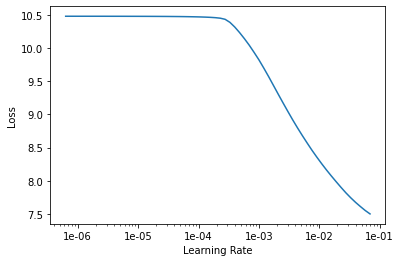

In [11]:
learn.recorder.plot(skip_end=15)

Train

In [13]:
learn.fit_one_cycle(10, 2e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.694231,1.979171,0.585325,54:21
1,1.311855,1.707772,0.625738,51:33
2,1.320493,1.575885,0.651085,51:26
3,1.166261,1.502478,0.669221,52:25
4,1.179953,1.439014,0.680631,51:33
5,1.071871,1.362693,0.694402,51:59
6,1.080683,1.308910,0.704684,52:11
7,1.034828,1.261611,0.712806,51:29
8,1.011904,1.241413,0.719626,52:45
9,1.078536,1.241482,0.720547,52:38


In [14]:
learn.save('c_lm_v1')